**Skenario 1 = Hitung Dataset (Mentahan)**

ANALISIS CLUSTERING BRAND FASHION
Total brand yang dianalisis: 25

Data awal:
       Namabrand   rank  equity  growth
0  Louis Vuitton  22.00   20868   11.36
1         Chanel  49.31   10068    4.31
2         Hermes  55.26    9072   11.03
3         Loreal  46.95    8848    4.92
4           Dior  86.17    5629    7.88

1. PERSIAPAN DATA
------------------------------
Fitur yang digunakan: ['rank', 'equity', 'growth']
Data missing: 0
✓ Data telah di-standardisasi

2. MENCARI JUMLAH CLUSTER OPTIMAL
----------------------------------------
Menguji berbagai nilai k...
k=2: Silhouette Score = 0.501
k=3: Silhouette Score = 0.405
k=4: Silhouette Score = 0.496
k=5: Silhouette Score = 0.485
k=6: Silhouette Score = 0.476
k=7: Silhouette Score = 0.432
k=8: Silhouette Score = 0.381
k=9: Silhouette Score = 0.351
k=10: Silhouette Score = 0.344

3. VISUALISASI HASIL PENGUJIAN
-----------------------------------


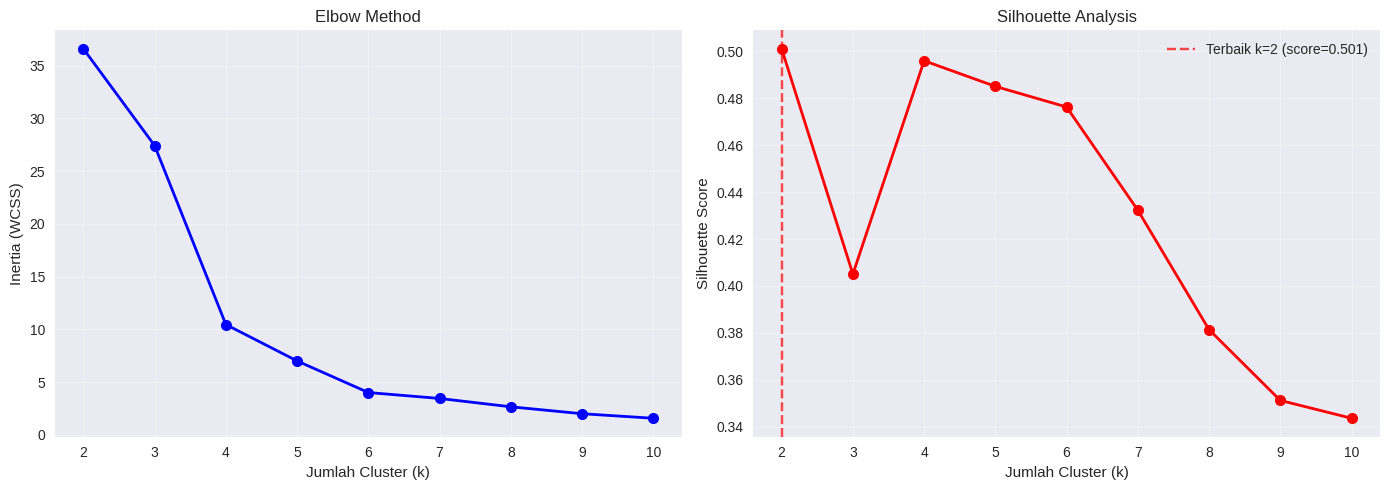

✓ Berdasarkan Silhouette Score, k optimal = 2
✓ Silhouette Score terbaik = 0.501

4. CLUSTERING DENGAN K OPTIMAL
-----------------------------------
Jumlah cluster yang digunakan: 3
Silhouette Score final: 0.405

5. HASIL CLUSTERING
-------------------------
Distribusi brand per cluster:
  Cluster 0: 8 brand
  Cluster 1: 14 brand
  Cluster 2: 3 brand

Karakteristik setiap cluster:

📊 CLUSTER 0
   Brand (8): Chanel, Hermes, Loreal, Adidas, Gucci, Zara, Cartier, Avon
   Rata-rata Rank: 54.8
   Rata-rata Equity: $8,227M
   Rata-rata Growth: 6.3%

📊 CLUSTER 1
   Brand (14): Dior, Lancome, Boss, Nivea, Prada, Bulgari, Armani, Rolex, Burberry, Tiffany, Levi's, Gap, Ralph & Lauren, Polo
   Rata-rata Rank: 86.9
   Rata-rata Equity: $3,910M
   Rata-rata Growth: -2.1%

📊 CLUSTER 2
   Brand (3): Louis Vuitton, H&M, Nike
   Rata-rata Rank: 23.9
   Rata-rata Equity: $18,908M
   Rata-rata Growth: 7.0%

6. VISUALISASI CLUSTERING
------------------------------


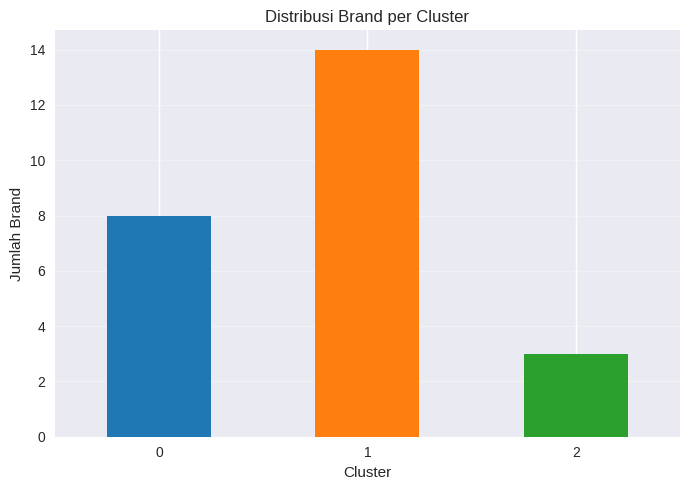


7. KESIMPULAN
---------------
✓ Analisis clustering berhasil dilakukan dengan 3 cluster
✓ Silhouette Score: 0.405 (semakin tinggi semakin baik)
✓ Setiap cluster memiliki karakteristik yang berbeda
✓ Hasil ini dapat digunakan untuk strategi marketing yang lebih tepat sasaran

📋 TABEL HASIL AKHIR:
     Namabrand  rank  equity  growth  Cluster
        Chanel 49.31   10068    4.31        0
        Hermes 55.26    9072   11.03        0
        Loreal 46.95    8848    4.92        0
        Adidas 61.14    6843    6.92        0
          Zara 43.65   10968    8.89        0
       Cartier 72.39    5811    6.96        0
         Gucci 44.38    9283    6.47        0
          Avon 65.08    4923    0.59        0
       Bulgari 94.50    2795    5.89        1
          Boss 96.50    4207  -48.47        1
          Dior 86.17    5629    7.88        1
         Nivea 92.55    2857    8.18        1
        Armani 94.11    2793    2.63        1
         Prada 88.17    4188    4.28        1
         Rol

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

# Mengatur style plot agar lebih menarik
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Data fashion brands
data = """Namabrand,rank,equity,growth
Louis Vuitton,22.00,20868,11.36
Chanel,49.31,10068,4.31
Hermes,55.26,9072,11.03
Loreal,46.95,8848,4.92
Dior,86.17,5629,7.88
Lancome,93.50,3319,5.19
Adidas,61.14,6843,6.92
Boss,96.50,4207,-48.47
Nivea,92.55,2857,8.18
Gucci,44.38,9283,6.47
Prada,88.17,4188,4.28
Bulgari,94.50,2795,5.89
Armani,94.11,2793,2.63
Zara,43.65,10968,8.89
H&M,25.29,17453,0.62
Cartier,72.39,5811,6.96
Rolex,70.00,4120,2.91
Burberry,89.60,4509,5.68
Nike,24.38,18403,9.12
Tiffany,77.95,4659,2.49
Levi's,83.00,3137,-6.32
Gap,65.43,5704,-5.09
Ralph & Lauren,90.20,4464,-19.30
Avon,65.08,4923,0.59
Polo,95.50,2362,4.00"""

# Membaca data
df = pd.read_csv(StringIO(data))

print("=" * 50)
print("ANALISIS CLUSTERING BRAND FASHION")
print("=" * 50)
print(f"Total brand yang dianalisis: {len(df)}")
print("\nData awal:")
print(df.head())

# ===============================
# 1. PERSIAPAN DATA
# ===============================
print("\n1. PERSIAPAN DATA")
print("-" * 30)

# Pilih kolom untuk clustering (rank, equity, growth)
fitur = ['rank', 'equity', 'growth']
X = df[fitur].copy()

print(f"Fitur yang digunakan: {fitur}")
print(f"Data missing: {X.isnull().sum().sum()}")

# Standardisasi data (penting untuk K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✓ Data telah di-standardisasi")

# ===============================
# 2. MENCARI JUMLAH CLUSTER OPTIMAL
# ===============================
print("\n2. MENCARI JUMLAH CLUSTER OPTIMAL")
print("-" * 40)

# Test berbagai jumlah cluster (k) dari 2 sampai 10
k_values = range(2, 11)
inertia_values = []  # Untuk elbow method
silhouette_values = []  # Untuk silhouette analysis

print("Menguji berbagai nilai k...")
for k in k_values:
    # Membuat model K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    # Simpan nilai inertia (untuk elbow method)
    inertia_values.append(kmeans.inertia_)

    # Hitung silhouette score
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_values.append(sil_score)

    print(f"k={k}: Silhouette Score = {sil_score:.3f}")

# ===============================
# 3. VISUALISASI PENGUJIAN
# ===============================
print("\n3. VISUALISASI HASIL PENGUJIAN")
print("-" * 35)

# Membuat plot untuk elbow method dan silhouette analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Elbow Method
ax1.plot(k_values, inertia_values, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Jumlah Cluster (k)')
ax1.set_ylabel('Inertia (WCSS)')
ax1.set_title('Elbow Method')
ax1.grid(True, alpha=0.3)

# Plot 2: Silhouette Analysis
ax2.plot(k_values, silhouette_values, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Jumlah Cluster (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')
ax2.grid(True, alpha=0.3)

# Menandai nilai k terbaik berdasarkan silhouette score
best_k = k_values[silhouette_values.index(max(silhouette_values))]
best_score = max(silhouette_values)

ax2.axvline(x=best_k, color='red', linestyle='--', alpha=0.7,
            label=f'Terbaik k={best_k} (score={best_score:.3f})')
ax2.legend()

plt.tight_layout()
plt.show()

print(f"✓ Berdasarkan Silhouette Score, k optimal = {best_k}")
print(f"✓ Silhouette Score terbaik = {best_score:.3f}")

# ===============================
# 4. CLUSTERING DENGAN K OPTIMAL
# ===============================
print("\n4. CLUSTERING DENGAN K OPTIMAL")
print("-" * 35)

# Gunakan k=3 (atau k terbaik dari analisis)
k_final = 3  # Bisa diganti dengan best_k jika ingin otomatis

# Membuat model final
kmeans_final = KMeans(n_clusters=k_final, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Menambahkan hasil cluster ke dataframe
df['Cluster'] = cluster_labels

# Hitung silhouette score final
final_silhouette = silhouette_score(X_scaled, cluster_labels)

print(f"Jumlah cluster yang digunakan: {k_final}")
print(f"Silhouette Score final: {final_silhouette:.3f}")

# ===============================
# 5. ANALISIS HASIL CLUSTERING
# ===============================
print("\n5. HASIL CLUSTERING")
print("-" * 25)

# Hitung jumlah brand per cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print("Distribusi brand per cluster:")
for cluster_id, count in cluster_counts.items():
    print(f"  Cluster {cluster_id}: {count} brand")

# Tampilkan karakteristik setiap cluster
print("\nKarakteristik setiap cluster:")
for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]

    print(f"\n CLUSTER {cluster_id}")
    print(f"   Brand ({len(cluster_data)}): {', '.join(cluster_data['Namabrand'].tolist())}")

    # Rata-rata setiap fitur
    avg_rank = cluster_data['rank'].mean()
    avg_equity = cluster_data['equity'].mean()
    avg_growth = cluster_data['growth'].mean()

    print(f"   Rata-rata Rank: {avg_rank:.1f}")
    print(f"   Rata-rata Equity: ${avg_equity:,.0f}M")
    print(f"   Rata-rata Growth: {avg_growth:.1f}%")

# ===============================
# 6. VISUALISASI CLUSTERING
# ===============================
print("\n6. VISUALISASI CLUSTERING")
print("-" * 30)

# Hanya menampilkan distribusi cluster
plt.figure(figsize=(7, 5))
cluster_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Cluster')
plt.ylabel('Jumlah Brand')
plt.title('Distribusi Brand per Cluster')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ===============================
# 7. KESIMPULAN
# ===============================
print("\n7. KESIMPULAN")
print("-" * 15)

print(f"✓ Analisis clustering berhasil dilakukan dengan {k_final} cluster")
print(f"✓ Silhouette Score: {final_silhouette:.3f} (semakin tinggi semakin baik)")
print(f"✓ Setiap cluster memiliki karakteristik yang berbeda")
print(f"✓ Hasil ini dapat digunakan untuk strategi marketing yang lebih tepat sasaran")

# Tampilkan tabel hasil akhir
print("\n TABEL HASIL AKHIR:")
print("=" * 60)
result_table = df[['Namabrand', 'rank', 'equity', 'growth', 'Cluster']].copy()
result_table = result_table.sort_values('Cluster')
print(result_table.to_string(index=False))

print("\n Clustering selesai! code by Antonina S")

**Skenario 2 = Hilangkan Atribut Growth**

ANALISIS CLUSTERING DENGAN 3 CLUSTER
Total brand yang dianalisis: 25

Data awal:
       Namabrand   rank  equity
0  Louis Vuitton  22.00   20868
1         Chanel  49.31   10068
2         Hermes  55.26    9072
3         Loreal  46.95    8848
4           Dior  86.17    5629

1. PERSIAPAN DATA
Data telah distandardisasi.

2. CLUSTERING DENGAN K=3

3. ANALISIS CLUSTER

Cluster 0 (8 brand):
Chanel, Hermes, Loreal, Adidas, Gucci, Zara, Gap, Avon
Rata-rata Rank: 53.90
Rata-rata Equity: 8,214

Cluster 1 (14 brand):
Dior, Lancome, Boss, Nivea, Prada, Bulgari, Armani, Cartier, Rolex, Burberry, Tiffany, Levi's, Ralph & Lauren, Polo
Rata-rata Rank: 87.44
Rata-rata Equity: 3,918

Cluster 2 (3 brand):
Louis Vuitton, H&M, Nike
Rata-rata Rank: 23.89
Rata-rata Equity: 18,908


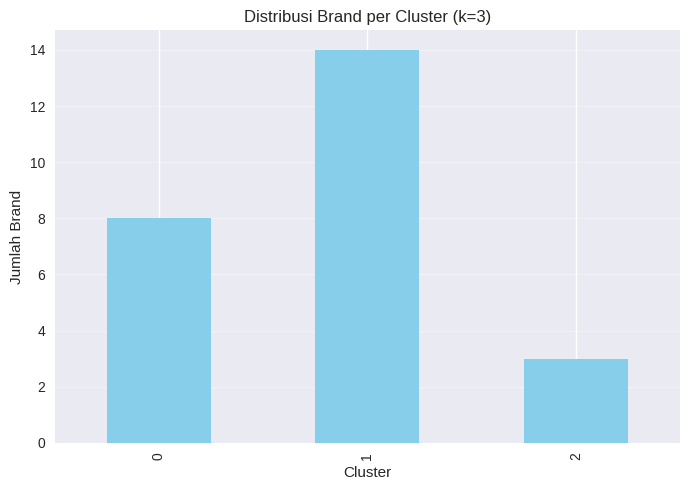


5. TABEL HASIL:
     Namabrand  rank  equity  Cluster
        Chanel 49.31   10068        0
        Hermes 55.26    9072        0
        Loreal 46.95    8848        0
        Adidas 61.14    6843        0
          Zara 43.65   10968        0
         Gucci 44.38    9283        0
           Gap 65.43    5704        0
          Avon 65.08    4923        0
       Bulgari 94.50    2795        1
          Boss 96.50    4207        1
         Prada 88.17    4188        1
         Nivea 92.55    2857        1
       Cartier 72.39    5811        1
        Armani 94.11    2793        1
       Lancome 93.50    3319        1
          Dior 86.17    5629        1
        Levi's 83.00    3137        1
       Tiffany 77.95    4659        1
         Rolex 70.00    4120        1
      Burberry 89.60    4509        1
Ralph & Lauren 90.20    4464        1
          Polo 95.50    2362        1
           H&M 25.29   17453        2
 Louis Vuitton 22.00   20868        2
          Nike 24.38   18403     

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# DATA tanpa growth
data = """Namabrand,rank,equity
Louis Vuitton,22.00,20868
Chanel,49.31,10068
Hermes,55.26,9072
Loreal,46.95,8848
Dior,86.17,5629
Lancome,93.50,3319
Adidas,61.14,6843
Boss,96.50,4207
Nivea,92.55,2857
Gucci,44.38,9283
Prada,88.17,4188
Bulgari,94.50,2795
Armani,94.11,2793
Zara,43.65,10968
H&M,25.29,17453
Cartier,72.39,5811
Rolex,70.00,4120
Burberry,89.60,4509
Nike,24.38,18403
Tiffany,77.95,4659
Levi's,83.00,3137
Gap,65.43,5704
Ralph & Lauren,90.20,4464
Avon,65.08,4923
Polo,95.50,2362"""

df = pd.read_csv(StringIO(data))

print("=" * 50)
print("ANALISIS CLUSTERING DENGAN 3 CLUSTER")
print("=" * 50)
print(f"Total brand yang dianalisis: {len(df)}")
print("\nData awal:")
print(df.head())

# 1. PERSIAPAN DATA
print("\n1. PERSIAPAN DATA")
fitur = ['rank', 'equity']
X = df[fitur].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data telah distandardisasi.")

# 2. CLUSTERING DENGAN K=3
print("\n2. CLUSTERING DENGAN K=3")
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 3. ANALISIS HASIL
print("\n3. ANALISIS CLUSTER")
for cluster_id in sorted(df['Cluster'].unique()):
    clus = df[df['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} ({len(clus)} brand):")
    print(", ".join(clus['Namabrand']))
    print(f"Rata-rata Rank: {clus['rank'].mean():.2f}")
    print(f"Rata-rata Equity: {clus['equity'].mean():,.0f}")

# 4. VISUALISASI DISTRIBUSI CLUSTER
plt.figure(figsize=(7, 5))
df['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribusi Brand per Cluster (k=3)")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Brand")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 5. TABEL HASIL
print("\n5. TABEL HASIL:")
print(df[['Namabrand', 'rank', 'equity', 'Cluster']].sort_values('Cluster').to_string(index=False))


**Skenario 3: Menguabah Parameter *Equity* Menjadi *Log_Equity***


SKENARIO 2: Transformasi equity → log_equity
---------------------------------------------
       Namabrand  equity  log_equity
0  Louis Vuitton   20868    4.319481
1         Chanel   10068    4.002943
2         Hermes    9072    3.957703
3         Loreal    8848    3.946845
4           Dior    5629    3.750431

Fitur yang digunakan untuk clustering: ['rank', 'log_equity', 'growth']

CLUSTERING DENGAN K=3
Silhouette Score: 0.517

Cluster 0 - (9 brand):
Louis Vuitton, Chanel, Hermes, Loreal, Adidas, Gucci, Zara, H&M, Nike
Rata-rata Rank: 41.37
Rata-rata Equity: 12,423
Rata-rata Growth: 7.07
Rata-rata log_equity: 4.06

Cluster 1 - (15 brand):
Dior, Lancome, Nivea, Prada, Bulgari, Armani, Cartier, Rolex, Burberry, Tiffany, Levi's, Gap, Ralph & Lauren, Avon, Polo
Rata-rata Rank: 83.88
Rata-rata Equity: 4,085
Rata-rata Growth: 1.73
Rata-rata log_equity: 3.59

Cluster 2 - (1 brand):
Boss
Rata-rata Rank: 96.50
Rata-rata Equity: 4,207
Rata-rata Growth: -48.47
Rata-rata log_equity: 3.62


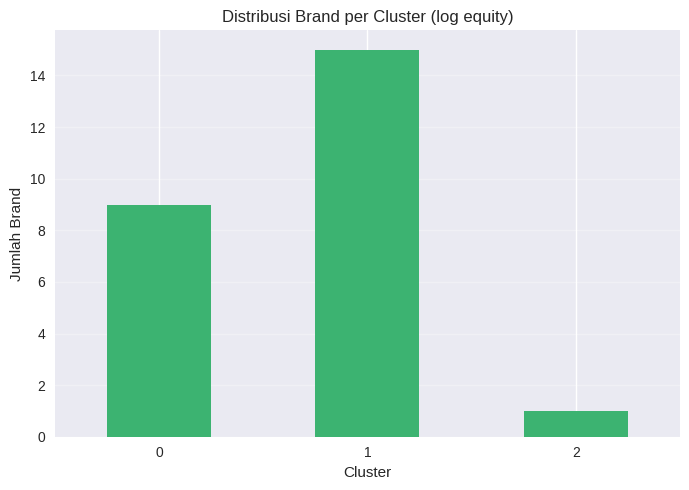


TABEL HASIL CLUSTER:
     Namabrand  rank  equity  growth  log_equity  Cluster
 Louis Vuitton 22.00   20868   11.36    4.319481        0
        Chanel 49.31   10068    4.31    4.002943        0
        Hermes 55.26    9072   11.03    3.957703        0
        Loreal 46.95    8848    4.92    3.946845        0
        Adidas 61.14    6843    6.92    3.835247        0
           H&M 25.29   17453    0.62    4.241870        0
          Zara 43.65   10968    8.89    4.040127        0
         Gucci 44.38    9283    6.47    3.967688        0
          Nike 24.38   18403    9.12    4.264889        0
       Bulgari 94.50    2795    5.89    3.446382        1
          Dior 86.17    5629    7.88    3.750431        1
       Lancome 93.50    3319    5.19    3.521007        1
        Armani 94.11    2793    2.63    3.446071        1
         Prada 88.17    4188    4.28    3.622007        1
       Cartier 72.39    5811    6.96    3.764251        1
         Nivea 92.55    2857    8.18    3.455910  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

data = """Namabrand,rank,equity,growth
Louis Vuitton,22.00,20868,11.36
Chanel,49.31,10068,4.31
Hermes,55.26,9072,11.03
Loreal,46.95,8848,4.92
Dior,86.17,5629,7.88
Lancome,93.50,3319,5.19
Adidas,61.14,6843,6.92
Boss,96.50,4207,-48.47
Nivea,92.55,2857,8.18
Gucci,44.38,9283,6.47
Prada,88.17,4188,4.28
Bulgari,94.50,2795,5.89
Armani,94.11,2793,2.63
Zara,43.65,10968,8.89
H&M,25.29,17453,0.62
Cartier,72.39,5811,6.96
Rolex,70.00,4120,2.91
Burberry,89.60,4509,5.68
Nike,24.38,18403,9.12
Tiffany,77.95,4659,2.49
Levi's,83.00,3137,-6.32
Gap,65.43,5704,-5.09
Ralph & Lauren,90.20,4464,-19.30
Avon,65.08,4923,0.59
Polo,95.50,2362,4.00"""

df = pd.read_csv(StringIO(data))

# ===============================
# SKENARIO 2: Menambahkan log_equity
# ===============================
print("\nSKENARIO 2: Transformasi equity → log_equity")
print("-" * 45)

# Menambahkan kolom baru: log_equity
df['log_equity'] = np.log10(df['equity'])

# Tampilkan beberapa nilai untuk melihat perbedaan
print(df[['Namabrand', 'equity', 'log_equity']].head())

# ===============================
# PERSIAPAN DATA UNTUK CLUSTERING
# ===============================
fitur = ['rank', 'log_equity', 'growth']
X = df[fitur].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nFitur yang digunakan untuk clustering:", fitur)

# ===============================
# CLUSTERING DENGAN K=3
# ===============================
print("\nCLUSTERING DENGAN K=3")
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

# ===============================
# ANALISIS PER CLUSTER
# ===============================
for cid in sorted(df['Cluster'].unique()):
    cluster = df[df['Cluster'] == cid]
    print(f"\nCluster {cid} - ({len(cluster)} brand):")
    print(", ".join(cluster['Namabrand']))
    print(f"Rata-rata Rank: {cluster['rank'].mean():.2f}")
    print(f"Rata-rata Equity: {cluster['equity'].mean():,.0f}")
    print(f"Rata-rata Growth: {cluster['growth'].mean():.2f}")
    print(f"Rata-rata log_equity: {cluster['log_equity'].mean():.2f}")

# ===============================
# VISUALISASI DISTRIBUSI
# ===============================
plt.figure(figsize=(7, 5))
df['Cluster'].value_counts().sort_index().plot(kind='bar', color='mediumseagreen')
plt.title("Distribusi Brand per Cluster (log equity)")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Brand")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ===============================
# TABEL HASIL AKHIR
# ===============================
print("\nTABEL HASIL CLUSTER:")
print(df[['Namabrand', 'rank', 'equity', 'growth', 'log_equity', 'Cluster']].sort_values('Cluster').to_string(index=False))

print("\nClustering selesai dengan transformasi log_equity!")
